In [7]:
import sys
sys.path.append('..')
from utils import read_video 
from trackers import Tracker
import cv2


video_frames = read_video("../input_videos/08fd33_4.mp4")

# initalize tracker
tracker = Tracker('../models/best.pt')

tracks = tracker.get_object_tracks(video_frames, read_from_stubs=True, stub_path='../stubs/track_stubs.pkl')


# save cropped image of a player
for track_id, player in tracks['players'][0].items():
    bbox = player['bbox']
    frame = video_frames[0]

    # crop bbox from frame
    cropped_image = frame[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]

    # save cropped image
    cv2.imwrite(f"../output_videos/cropped_img.jpg", cropped_image)
    break

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [9]:
image_path = f"../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

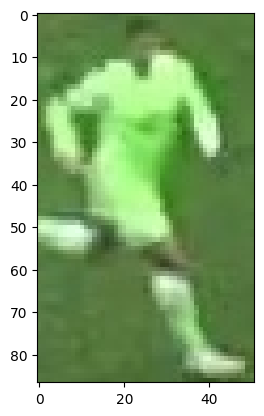

In [10]:
plt.imshow(image)

# take top half of image

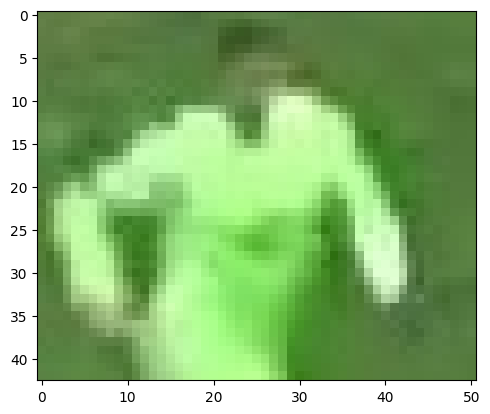

In [11]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)

# cluster image into two clusters

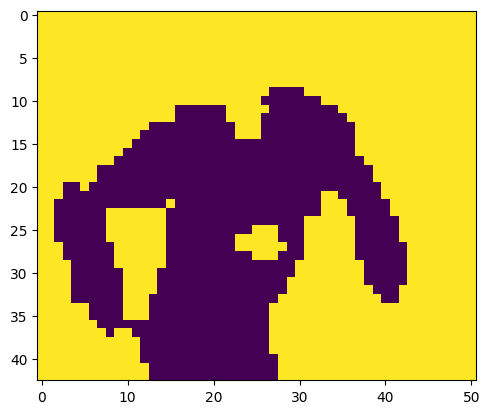

In [17]:
# reshape image into 2D array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with two clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get cluster labels
labels = kmeans.labels_

# reshape labels into original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# display clustered image
plt.imshow(clustered_image)
plt.show()

In [18]:
# get clusters from coners, custer that apear the most is background
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)


1


In [19]:
# get player cluster
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [20]:
kmeans.cluster_centers_[player_cluster]

array([     171.08,      235.21,      142.74])